In [20]:
import pandas as pd
import numpy as np
import os

print("Librerie importate con successo!")

# Aggiorniamo i percorsi includendo la sottocartella "UCI HAR Dataset"
base_path = 'dataset/UCI HAR Dataset/'

# 1. Carichiamo i nomi delle feature (solo per averli pronti)
features_path = base_path + 'features.txt'
features_df = pd.read_csv(features_path, sep=r'\s+', header=None, names=['index', 'feature_name'])
feature_names = features_df['feature_name'].values

# 2. Carichiamo i dati di Training SENZA assegnare i nomi per ora
X_train_path = base_path + 'train/X_train.txt'
# Nota: ho tolto "names=feature_names" qui sotto
X_train = pd.read_csv(X_train_path, sep=r'\s+', header=None) 

# 3. Carichiamo le etichette (y_train)
y_train_path = base_path + 'train/y_train.txt'
y_train = pd.read_csv(y_train_path, sep=r'\s+', header=None, names=['activity_id'])

print(f"X_train shape: {X_train.shape}")


print("Dati caricati (senza intestazioni)!")

Librerie importate con successo!
Dati caricati (senza intestazioni)!
X_train shape: (7352, 561)


In [3]:
import os

# Vediamo cosa c'è dentro la cartella "dataset"
print(os.listdir('dataset'))

['.DS_Store', 'UCI HAR Dataset', 'UCI HAR Dataset.zip', 'UCI HAR Dataset.names']


In [7]:
# 1. Creiamo una lista di nomi unici
new_feature_names = []
seen_names = {}

for name in feature_names:
    if name in seen_names:
        seen_names[name] += 1
        # Se il nome esiste già, aggiungiamo un suffisso (es. "Energy_1")
        new_name = f"{name}_{seen_names[name]}"
    else:
        seen_names[name] = 0
        new_name = name
    new_feature_names.append(new_name)

# 2. Assegniamo i nuovi nomi alle colonne del tuo DataFrame
X_train.columns = new_feature_names

# 3. Uniamo le etichette (y) ai dati (X) per avere tutto insieme
data_train = pd.concat([y_train, X_train], axis=1)

print("Nomi colonne sistemati e dataset unito!")
display(data_train.head())

Nomi colonne sistemati e dataset unito!


,activity_id,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


/var/folders/pg/ylbg120160l7nj2jl5pckps40000gn/T/ipykernel_28077/3592090894.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Activity_Name', data=data_train, palette='viridis')


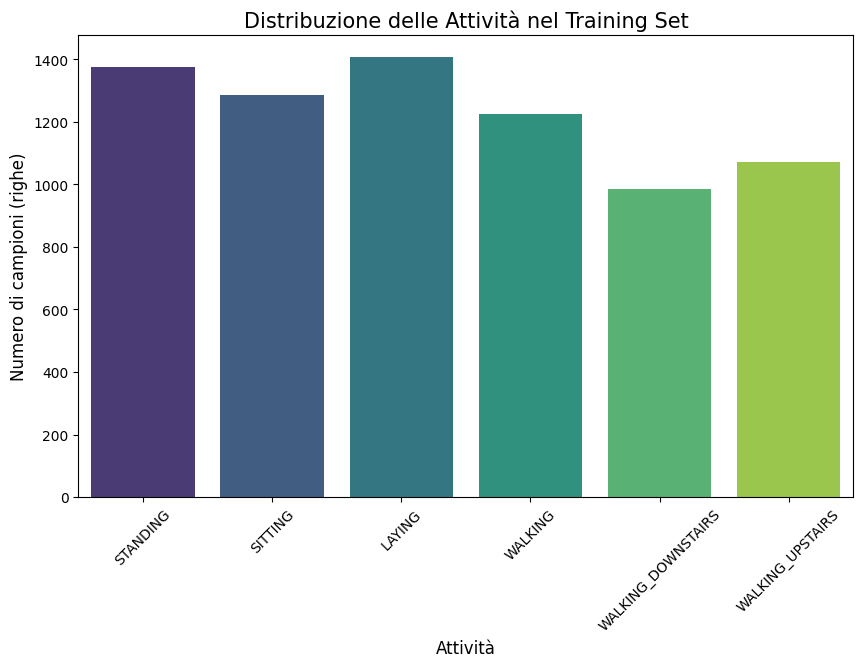

Activity_Name
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carichiamo le etichette delle attività (per avere i nomi veri)
labels_path = base_path + 'activity_labels.txt'
activity_labels = pd.read_csv(labels_path, sep=r'\s+', header=None, names=['id', 'label'])

# Creiamo un dizionario per mappare id -> nome (es. 1 -> WALKING)
label_map = dict(zip(activity_labels['id'], activity_labels['label']))

# 2. Aggiungiamo una colonna con i nomi delle attività al nostro dataset
data_train['Activity_Name'] = data_train['activity_id'].map(label_map)

# 3. Contiamo e Visualizziamo
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity_Name', data=data_train, palette='viridis')
plt.title('Distribuzione delle Attività nel Training Set', fontsize=15)
plt.xlabel('Attività', fontsize=12)
plt.ylabel('Numero di campioni (righe)', fontsize=12)
plt.xticks(rotation=45) # Ruotiamo i nomi per leggerli meglio
plt.show()

# Stampiamo i numeri esatti
print(data_train['Activity_Name'].value_counts())

Riprovo il calcolo t-SNE (senza parametri extra)... incrociamo le dita! 🤞
Calcolo finito! Genero il grafico... 🎨


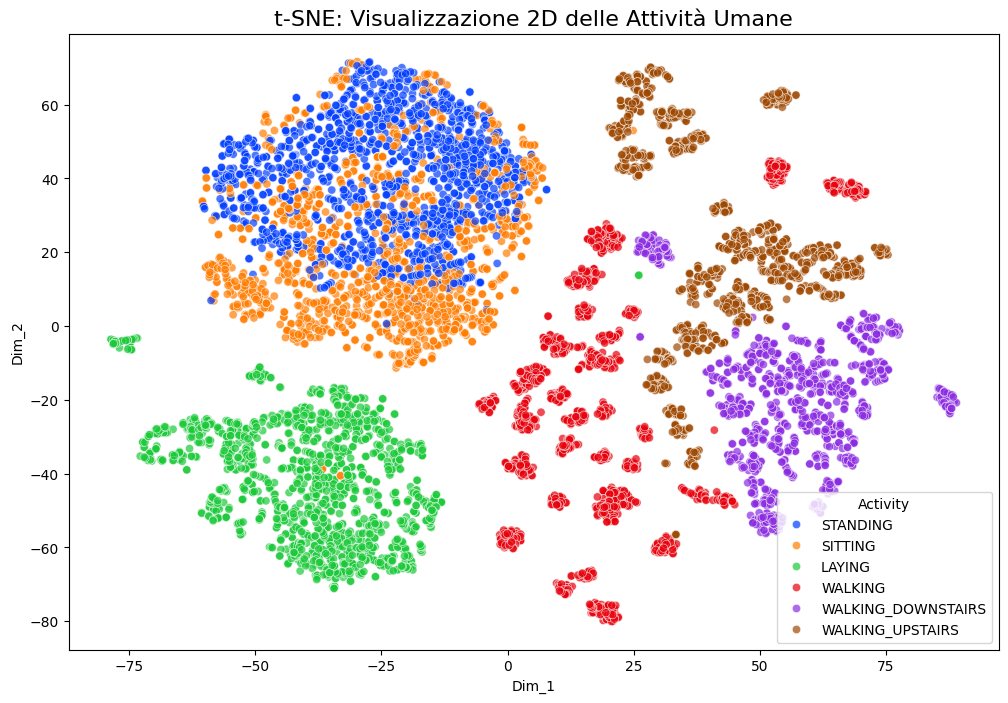

In [11]:
from sklearn.manifold import TSNE

print("Riprovo il calcolo t-SNE (senza parametri extra)... incrociamo le dita! 🤞")

# 1. Prepariamo i dati (togliamo le etichette di testo e numeriche, vogliamo solo i dati dei sensori)
# Nota: usiamo .copy() per evitare avvisi
X_for_tsne = data_train.drop(['Activity_Name', 'activity_id'], axis=1).copy()

# 2. Eseguiamo t-SNE (Versione semplificata)
# Ho tolto n_iter, usiamo il default
tsne = TSNE(n_components=2, random_state=42) 
X_embedded = tsne.fit_transform(X_for_tsne)

# 3. Creiamo un nuovo DataFrame per il grafico
tsne_data = pd.DataFrame(data=X_embedded, columns=['Dim_1', 'Dim_2'])
tsne_data['Activity'] = data_train['Activity_Name']

print("Calcolo finito! Genero il grafico... 🎨")

# 4. Disegniamo lo Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Dim_1', y='Dim_2', hue='Activity', data=tsne_data, palette='bright', alpha=0.7)
plt.title('t-SNE: Visualizzazione 2D delle Attività Umane', fontsize=16)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Prepariamo Input (X) e Output (y)
X = data_train.drop(['Activity_Name', 'activity_id'], axis=1)
y = data_train['Activity_Name']

# 2. Dividiamo: 80% per studiare, 20% per l'interrogazione
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X, y, test_size=0.2, random_state=42)

print("Addestro la Random Forest... (ci vorrà qualche secondo) 🌲")

# 3. Creiamo e alleniamo il modello
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# 4. Facciamo una previsione sui dati di test
y_pred = rf_model.predict(X_val_split)

# 5. Vediamo i risultati!
accuracy = accuracy_score(y_val_split, y_pred)
print(f"\n🎯 Accuratezza del modello: {accuracy:.2%}")
print("\nReport dettagliato:")
print(classification_report(y_val_split, y_pred))

Addestro la Random Forest... (ci vorrà qualche secondo) 🌲

🎯 Accuratezza del modello: 97.89%

Report dettagliato:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.95      0.95       262
          STANDING       0.96      0.96      0.96       276
           WALKING       1.00      0.99      1.00       247
WALKING_DOWNSTAIRS       1.00      0.98      0.99       206
  WALKING_UPSTAIRS       0.97      0.99      0.98       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



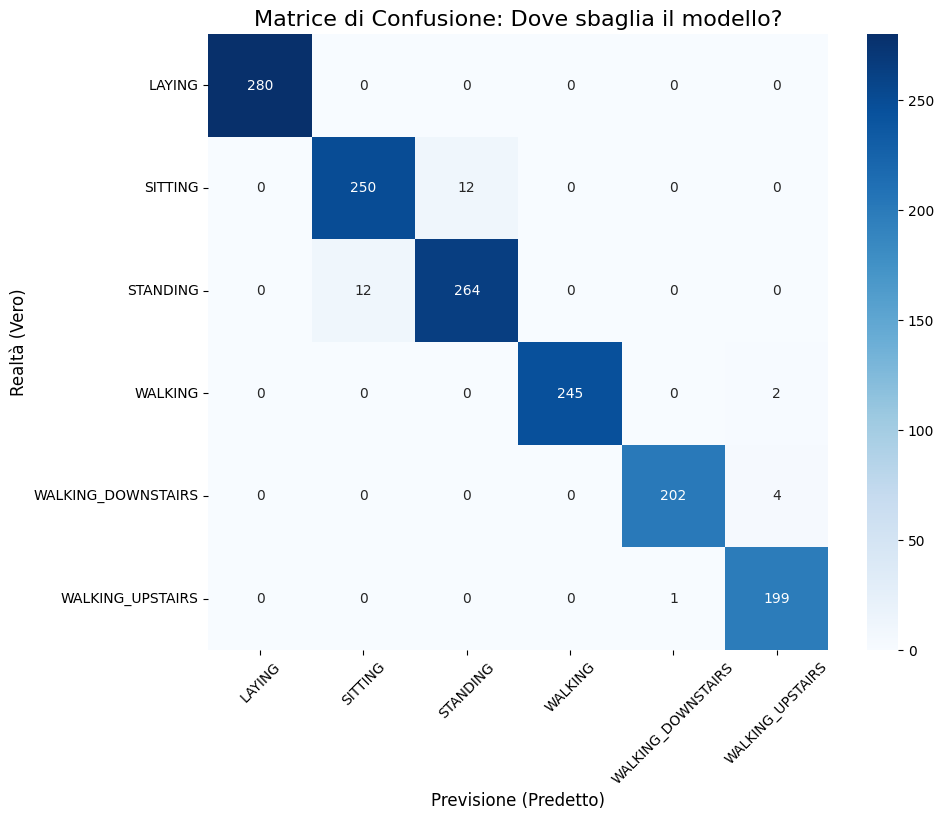

In [13]:
from sklearn.metrics import confusion_matrix

# 1. Calcoliamo la matrice
cm = confusion_matrix(y_val_split, y_pred)

# 2. Disegniamola bene
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, 
            yticklabels=rf_model.classes_)
plt.title('Matrice di Confusione: Dove sbaglia il modello?', fontsize=16)
plt.ylabel('Realtà (Vero)', fontsize=12)
plt.xlabel('Previsione (Predetto)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

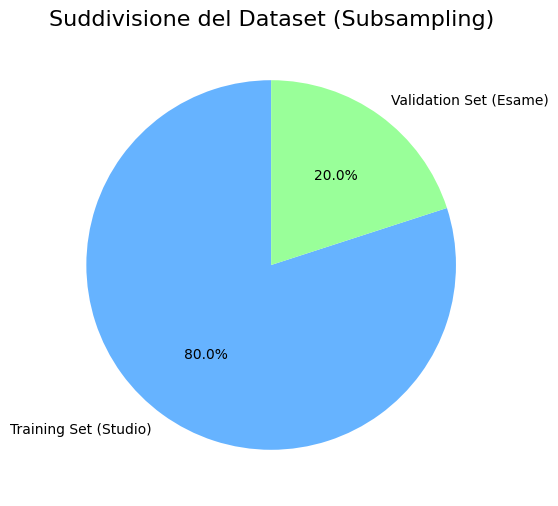

Campioni per studiare: 5881
Campioni per l'esame: 1471


In [14]:
# Visualizziamo come abbiamo diviso i dati (Subsampling)
counts = [len(y_train_split), len(y_val_split)]
labels = ['Training Set (Studio)', 'Validation Set (Esame)']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('Suddivisione del Dataset (Subsampling)', fontsize=16)
plt.show()

print(f"Campioni per studiare: {len(y_train_split)}")
print(f"Campioni per l'esame: {len(y_val_split)}")

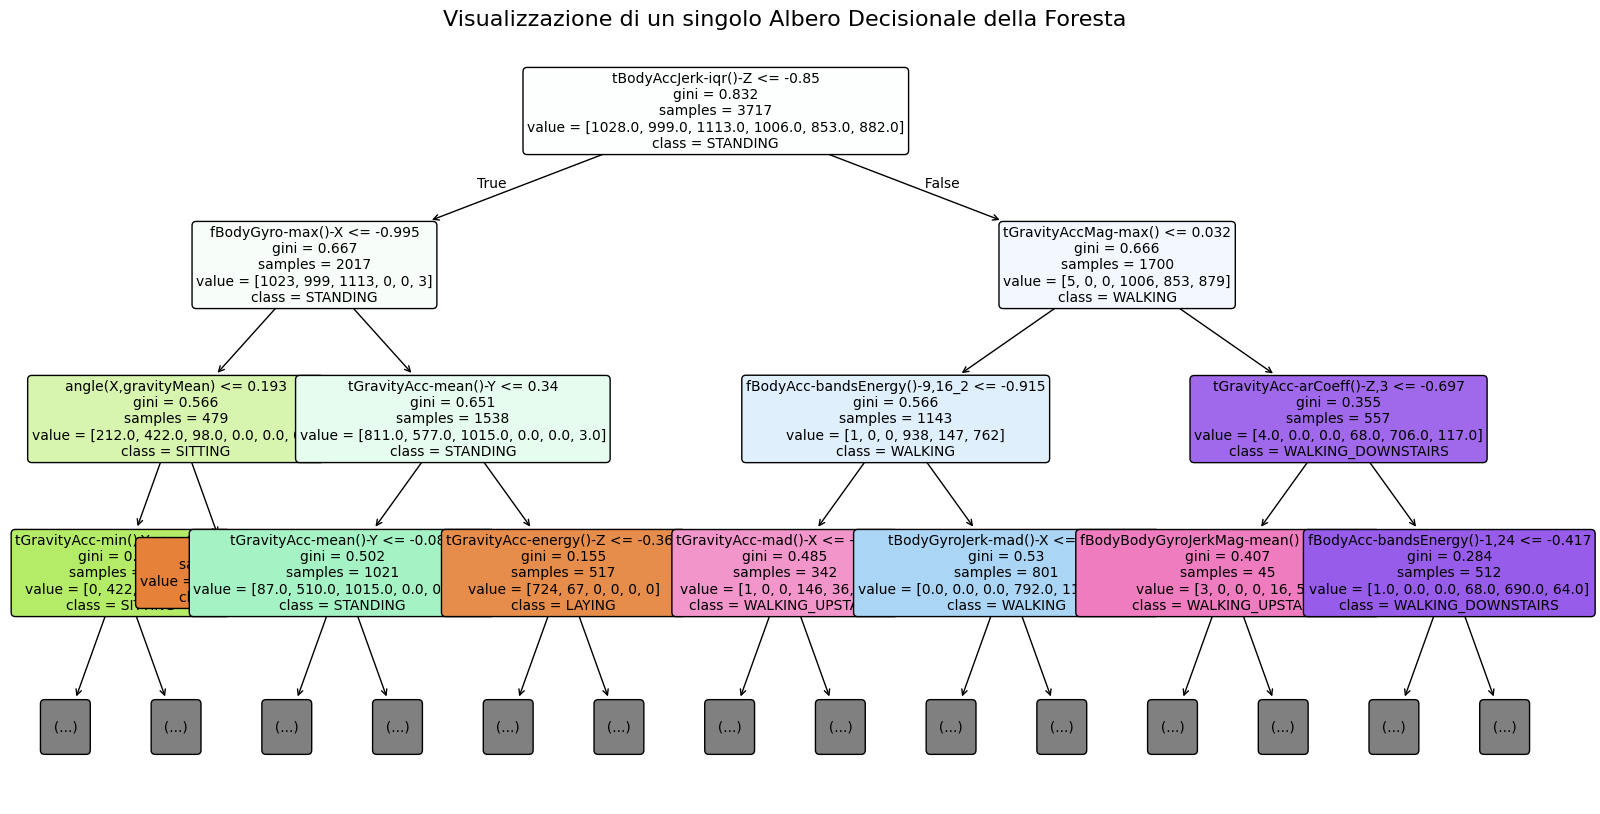

In [15]:
from sklearn.tree import plot_tree

# Prendiamo un albero a caso dalla foresta (es. il primo)
one_tree = rf_model.estimators_[0]

# Lo disegniamo
plt.figure(figsize=(20, 10))
plot_tree(one_tree, 
          feature_names=X.columns,  
          class_names=rf_model.classes_,
          filled=True, 
          rounded=True, 
          max_depth=3, # Limitiamo la profondità se no diventa illeggibile!
          fontsize=10)
plt.title("Visualizzazione di un singolo Albero Decisionale della Foresta", fontsize=16)
plt.show()

/var/folders/pg/ylbg120160l7nj2jl5pckps40000gn/T/ipykernel_28077/339363239.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


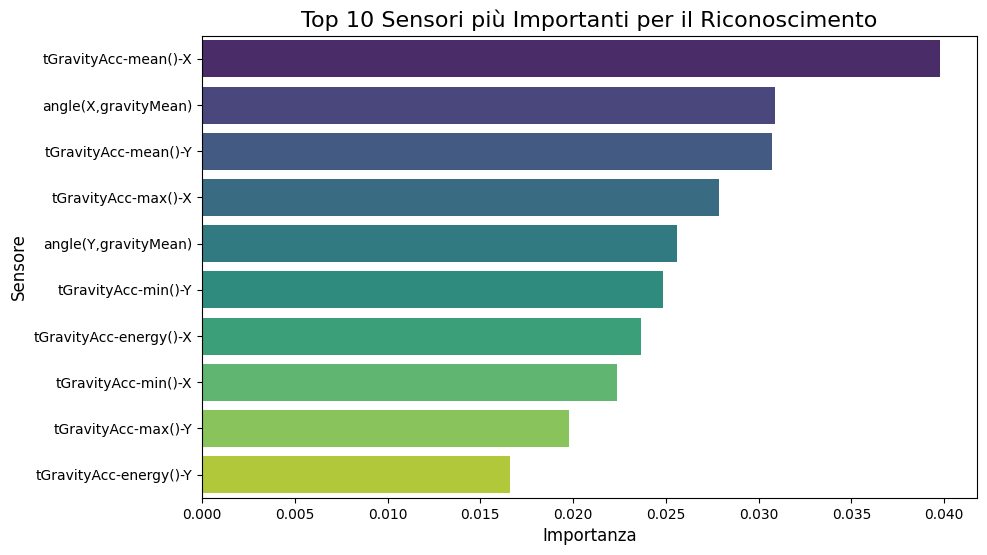

In [17]:
# 1. Estraiamo l'importanza di ogni "neurone" (feature)
importances = rf_model.feature_importances_
feature_names = X.columns

# 2. Creiamo la classifica
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. Disegniamo il grafico dei Top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Sensori più Importanti per il Riconoscimento', fontsize=16)
plt.xlabel('Importanza', fontsize=12)
plt.ylabel('Sensore', fontsize=12)
plt.show()

/var/folders/pg/ylbg120160l7nj2jl5pckps40000gn/T/ipykernel_28077/669725223.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity_Name', y=feature, data=data_train, palette='viridis')
/var/folders/pg/ylbg120160l7nj2jl5pckps40000gn/T/ipykernel_28077/669725223.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity_Name', y=feature, data=data_train, palette='viridis')
/var/folders/pg/ylbg120160l7nj2jl5pckps40000gn/T/ipykernel_28077/669725223.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity_Name', y=feature, d

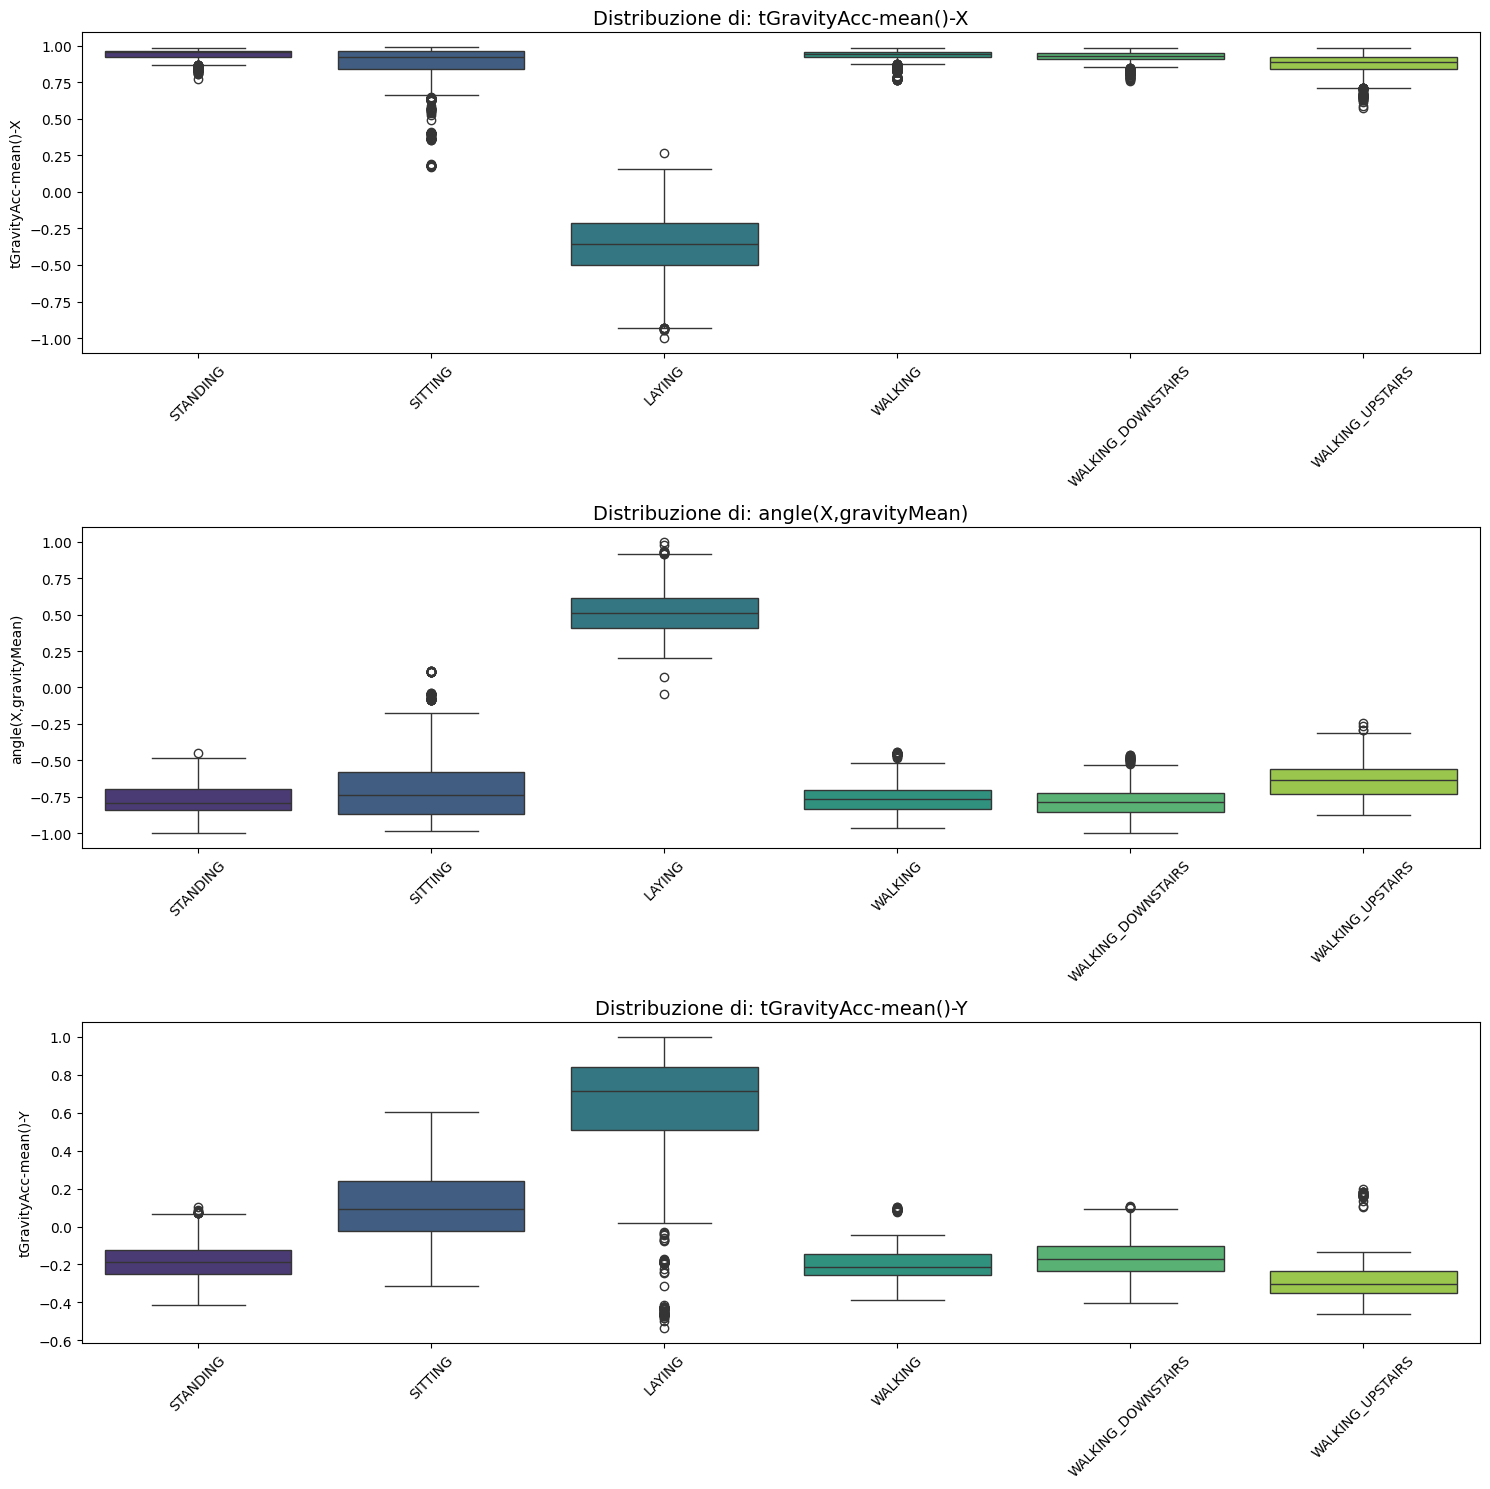

In [19]:
# Prendiamo i nomi delle 3 feature più importanti che abbiamo appena calcolato
top_features = feature_importance_df['Feature'].head(3).values

plt.figure(figsize=(15, 5 * len(top_features)))

for i, feature in enumerate(top_features):
    plt.subplot(len(top_features), 1, i + 1)
    
    # Disegniamo il boxplot: X = Attività, Y = Valore del sensore
    sns.boxplot(x='Activity_Name', y=feature, data=data_train, palette='viridis')
    
    plt.title(f'Distribuzione di: {feature}', fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel('')

plt.tight_layout()
plt.show()